 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [132]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [133]:
# Reading whale returns

whale_returns_df = pd.read_csv("whale_returns.csv", index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [134]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [135]:
# Drop nulls
whale_returns_df = whale_returns_df.dropna()

In [136]:
# sorting the dataframe ascending order from earlier date to latest date
whale_returns_df.sort_index(inplace=True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [137]:
# Verification of having no null values in the dataframe
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [138]:
# Reading algorithmic returns
algo_returns_df = pd.read_csv("algo_returns.csv",index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [139]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [140]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna()
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [141]:
# sorting the dataframe ascending order from earlier date to latest date
algo_returns_df.sort_index(inplace=True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [142]:
# Verification of having no null values in the dataframe
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [143]:
# Reading S&P TSX 60 Closing Prices
sp_tsx = pd.read_csv("sp_tsx_history.csv",index_col="Date", parse_dates=True, infer_datetime_format=True)
sp_tsx.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [144]:
# Check Data Types
sp_tsx.dtypes

Close    object
dtype: object

In [145]:
# Fix Data Types
sp_tsx["Close"] = sp_tsx["Close"].str.replace("$","")
sp_tsx["Close"] = sp_tsx["Close"].str.replace(",","")
sp_tsx["Close"] = sp_tsx["Close"].astype("float")
sp_tsx.head()

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_3356/1115391837.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp_tsx["Close"] = sp_tsx["Close"].str.replace("$","")


,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [146]:
# Calculate Daily Returns
sp_tsx_daily_returns = sp_tsx.pct_change()
sp_tsx_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [147]:
# Drop nulls
sp_tsx_daily_returns.dropna(inplace=True)

In [148]:
# Verification of having no null values in the dataframe
sp_tsx_daily_returns.isnull().sum()

Close    0
dtype: int64

In [149]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_daily_returns = sp_tsx_daily_returns.rename(columns={
    "Close" : "S&P TSX"
})

In [150]:
# sorting the dataframe ascending order from earlier date to latest date
sp_tsx_daily_returns.sort_index(inplace=True)
sp_tsx_daily_returns.head()

,S&P TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [151]:
# Joining Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns using inner join.
combined_df = pd.concat([whale_returns_df,algo_returns_df,sp_tsx_daily_returns], axis = 1, join = "inner")
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns of all portfolio'}, xlabel='Date'>

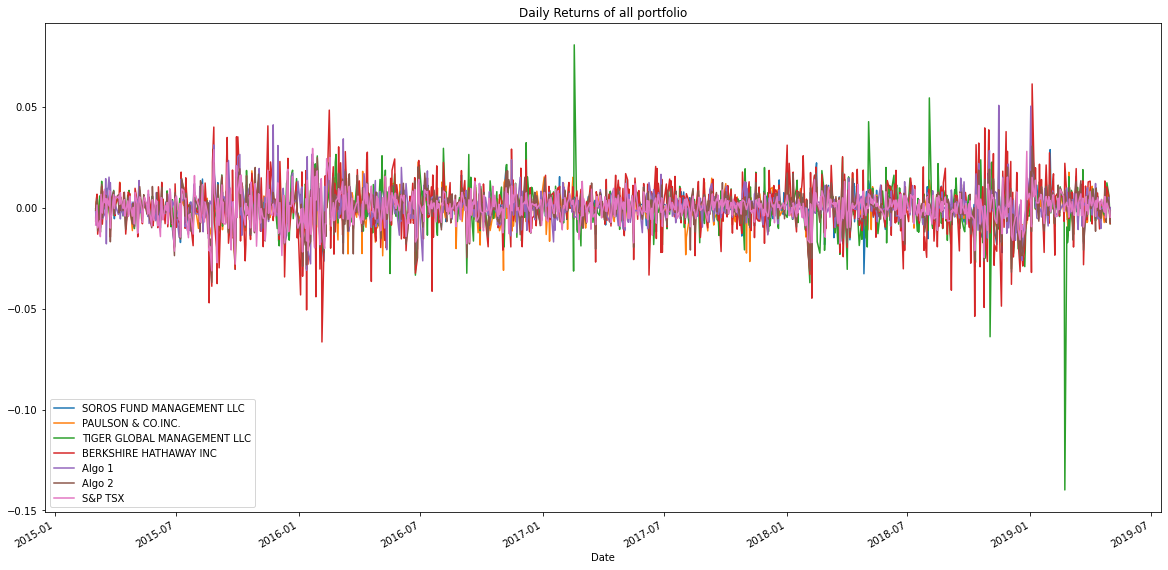

In [152]:
# Plotting daily returns of all portfolios
combined_df.plot(figsize=(20,10),title="Daily Returns of all portfolio")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns of all portfolio'}, xlabel='Date'>

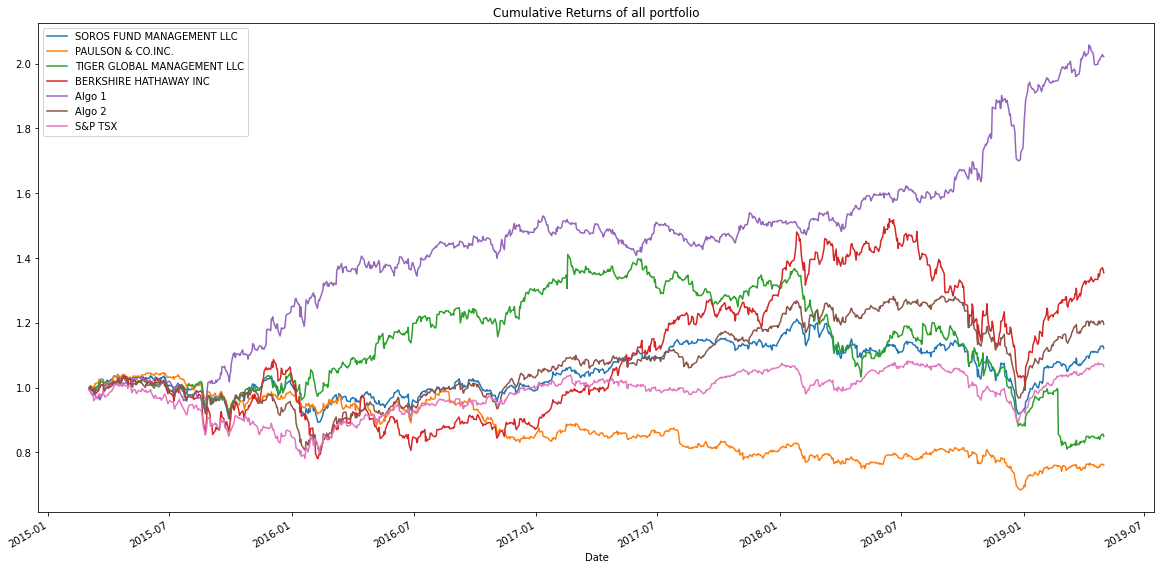

In [153]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10),title="Cumulative Returns of all portfolio")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

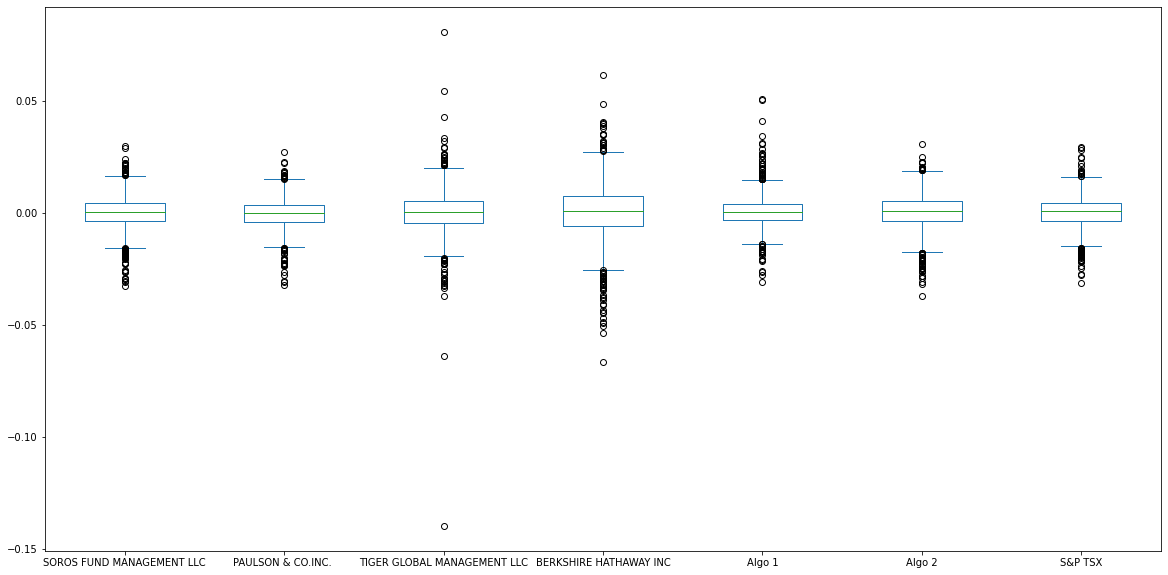

In [154]:
# Box plot to visually show risk
combined_df.plot.box(figsize=(20,10))

### Calculate Standard Deviations

In [155]:
# Calculate the daily standard deviations of all portfolios
daily_std = combined_df.std().sort_values(ascending=False)
daily_std

BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
S&P TSX                        0.007034
PAULSON & CO.INC.              0.006982
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [156]:
# Calculate  the daily standard deviation of S&P TSX 60
daily_std_df = pd.DataFrame(daily_std)
daily_std_df.columns = ["std"]
daily_std_df

,std
BERKSHIRE HATHAWAY INC,0.012826
TIGER GLOBAL MANAGEMENT LLC,0.010883
Algo 2,0.008326
SOROS FUND MANAGEMENT LLC,0.007828
Algo 1,0.007589
S&P TSX,0.007034
PAULSON & CO.INC.,0.006982


In [157]:
# Determine which portfolios are riskier than the S&P TSX 60
high_risk_portfolio = daily_std_df[daily_std_df["std"] > daily_std_df.loc["S&P TSX","std"]]
high_risk_portfolio

,std
BERKSHIRE HATHAWAY INC,0.012826
TIGER GLOBAL MANAGEMENT LLC,0.010883
Algo 2,0.008326
SOROS FUND MANAGEMENT LLC,0.007828
Algo 1,0.007589


### Calculate the Annualized Standard Deviation

In [158]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std

BERKSHIRE HATHAWAY INC         0.203599
TIGER GLOBAL MANAGEMENT LLC    0.172759
Algo 2                         0.132177
SOROS FUND MANAGEMENT LLC      0.124259
Algo 1                         0.120470
S&P TSX                        0.111664
PAULSON & CO.INC.              0.110841
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling Standard Deviation for 21 days'}, xlabel='Date'>

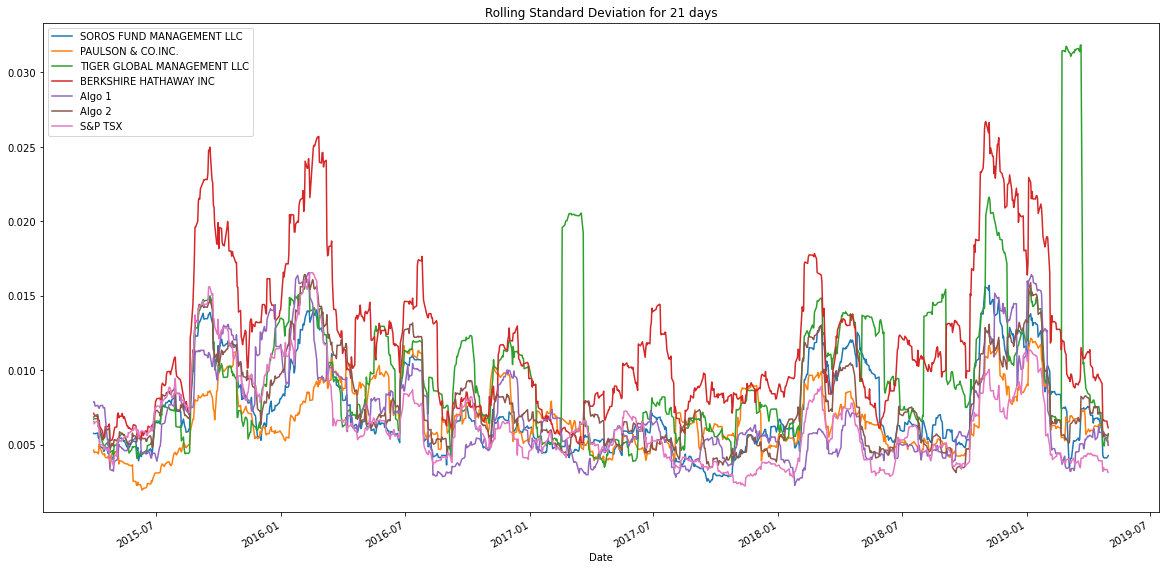

In [159]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_21_std = combined_df.rolling(window=21).std()

# Plot the rolling standard deviation
rolling_21_std.plot(figsize=(20,10),title="Rolling Standard Deviation for 21 days")

### Calculate and plot the correlation

In [160]:
# Calculate the correlation
correlation = combined_df.corr()

# Display de correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


<AxesSubplot:>

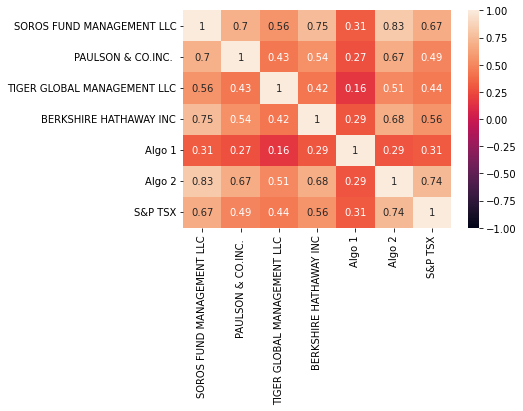

In [161]:
sns.heatmap(correlation,  vmin=-1, vmax=1,annot=True)

## Observation for correalted portfolio's with S&P TSX 60
From the above heat map we can say that Algo 2 portfolio mimicks the S&P TSX protfolio among all other portfolios

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:title={'center':'Beta Trend of Algo 2 Portfolio'}, xlabel='Date'>

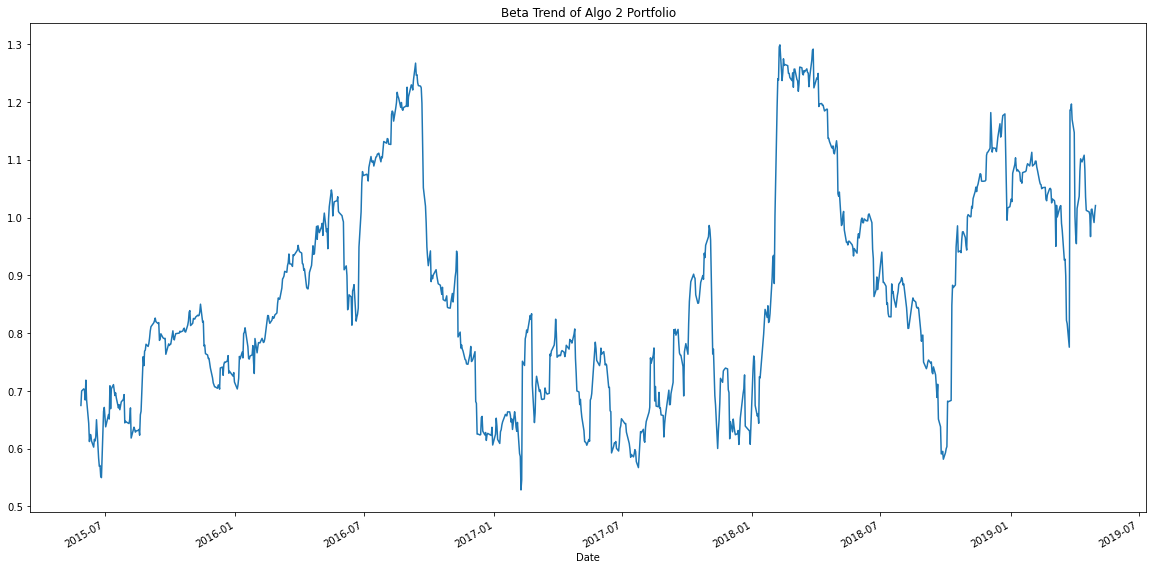

In [162]:
# Calculate covariance of a single portfolio
covariance_algo_2 = combined_df['Algo 2'].rolling(window=60).cov(combined_df['S&P TSX'])

# Calculate variance of S&P TSX
variance_snp_tsx = combined_df['S&P TSX'].rolling(window=60).var()

# Computing beta
algo_2_beta = covariance_algo_2 / variance_snp_tsx

# Plot beta trend
algo_2_beta.plot(title="Beta Trend of Algo 2 Portfolio", figsize=(20, 10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'Rolling EWMA with 21 day half life'}, xlabel='Date'>

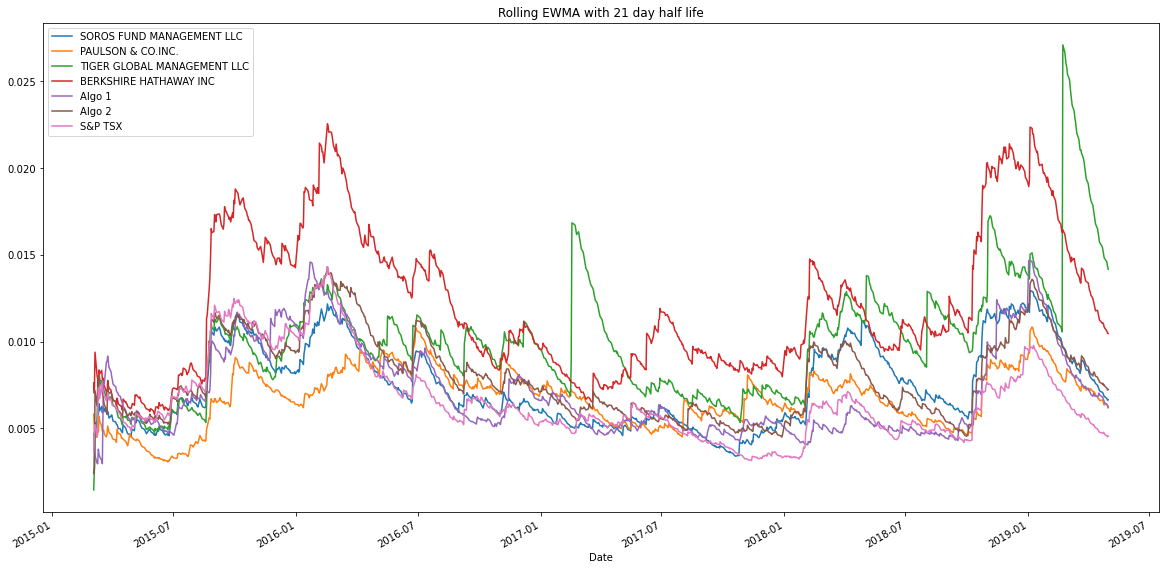

In [163]:
# Use `ewm` to calculate the rolling window
rolling_21_ewma = combined_df.ewm(halflife=21).std().plot(title="Rolling EWMA with 21 day half life", figsize=(20, 10))
rolling_21_ewma

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [164]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX                        0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios of all Portfolios'}>

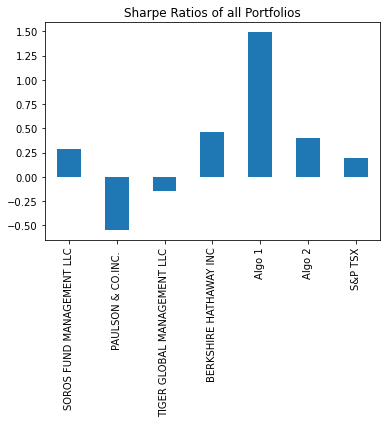

In [165]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios of all Portfolios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Based on above Sharpe Ratio bar plot, we can say that Algo 1 is outperformin both S&P TSX 60 and the whale portfolios

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [166]:
# Reading data from 1st stock
amzn_df = pd.read_csv("amzn_historical.csv")
amzn_df["Dates"] = pd.to_datetime(amzn_df["Date"]).dt.date
amzn_df.set_index("Dates",inplace=True)
amzn_df.drop(columns="Date",inplace=True)
amzn_df.index.names = ["Date"]
amzn_df.head()

,Close
Date,
2018-01-02,1189.01
2018-01-03,1204.20
2018-01-04,1209.59
2018-01-05,1229.14
2018-01-08,1246.87


In [167]:
# Reading data from 2nd stock
aapl_df = pd.read_csv("aapl_historical.csv")
aapl_df["Dates"] = pd.to_datetime(aapl_df["Date"]).dt.date
aapl_df.set_index("Dates",inplace=True)
aapl_df.drop(columns="Date",inplace=True)
aapl_df.index.names = ["Date"]
aapl_df.head()

,Close
Date,
2018-01-02,43.07
2018-01-03,43.06
2018-01-04,43.26
2018-01-05,43.75
2018-01-08,43.59


In [168]:
# Reading data from 3rd stock
tsla_df = pd.read_csv("tsla_historical.csv")
tsla_df["Dates"] = pd.to_datetime(tsla_df["Date"]).dt.date
tsla_df.set_index("Dates",inplace=True)
tsla_df.drop(columns="Date",inplace=True)
tsla_df.index.names = ["Date"]
tsla_df.head()

,Close
Date,
2018-01-02,64.11
2018-01-03,63.45
2018-01-04,62.92
2018-01-05,63.32
2018-01-08,67.28


In [169]:
# Combine all stocks in a single DataFrame
custom_portfolio_df = pd.concat([amzn_df,aapl_df,tsla_df], axis=1, join="inner")
custom_portfolio_df

,Close,Close,Close
Date,,,
2018-01-02,1189.01,43.07,64.11
2018-01-03,1204.20,43.06,63.45
2018-01-04,1209.59,43.26,62.92
2018-01-05,1229.14,43.75,63.32
2018-01-08,1246.87,43.59,67.28
...,...,...,...
2019-12-20,1786.50,69.86,81.12
2019-12-23,1793.00,71.00,83.84
2019-12-24,1789.21,71.07,85.05


In [170]:
# Reset Date index
custom_portfolio_df.sort_index(inplace=True)

In [171]:
# Reorganize portfolio data by having a column per symbol
custom_portfolio_df.columns = ['AMZN', 'AAPL', 'TSLA']
custom_portfolio_df.head()

,AMZN,AAPL,TSLA
Date,,,
2018-01-02,1189.01,43.07,64.11
2018-01-03,1204.20,43.06,63.45
2018-01-04,1209.59,43.26,62.92
2018-01-05,1229.14,43.75,63.32
2018-01-08,1246.87,43.59,67.28


In [172]:
# Before calculating Daily return, we need to check if there is any null value and then drop it
custom_portfolio_df.isnull().sum()

AMZN    0
AAPL    0
TSLA    0
dtype: int64

In [173]:
# Calculate daily returns
custom_portfolio_daily_returns = custom_portfolio_df.pct_change()

# Drop NAs
custom_portfolio_daily_returns.dropna(inplace=True)

# Display sample data
custom_portfolio_daily_returns.head()

,AMZN,AAPL,TSLA
Date,,,
2018-01-03,0.012775,-0.000232,-0.010295
2018-01-04,0.004476,0.004645,-0.008353
2018-01-05,0.016163,0.011327,0.006357
2018-01-08,0.014425,-0.003657,0.062539
2018-01-09,0.004676,-0.000229,-0.008026


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [174]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
custom_portfolio_returns = custom_portfolio_daily_returns.dot(weights)

# Display sample data
custom_portfolio_returns.head()

Date
2018-01-03    0.000749
2018-01-04    0.000256
2018-01-05    0.011282
2018-01-08    0.024436
2018-01-09   -0.001193
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [175]:
# Join your returns DataFrame to the original returns DataFrame
combined_portfolios = pd.concat([whale_returns_df,algo_returns_df,sp_tsx_daily_returns,custom_portfolio_returns], axis = 1, join = "inner")
combined_portfolios.rename(columns={0:"Custom_Portfolio"},inplace=True)
combined_portfolios.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:334: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  joined_ndarray, lidx, ridx = libjoin.inner_join_indexer(sv, ov)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,Custom_Portfolio
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.000749
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.000256
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,0.011282
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,0.024436
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.001193


In [176]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_portfolios.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P TSX                        0
Custom_Portfolio               0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [177]:
# Calculate the annualized `std`
combined_portfolios_daily_std = combined_portfolios.std()
combined_portfolios_annual_std = combined_portfolios_daily_std * np.sqrt(252)
combined_portfolios_annual_std.sort_values(ascending=False)

Custom_Portfolio               0.301855
BERKSHIRE HATHAWAY INC         0.227445
TIGER GLOBAL MANAGEMENT LLC    0.219833
SOROS FUND MANAGEMENT LLC      0.145675
Algo 2                         0.137664
Algo 1                         0.120028
PAULSON & CO.INC.              0.114343
S&P TSX                        0.099121
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation of Combined Portfolios'}, xlabel='Date'>

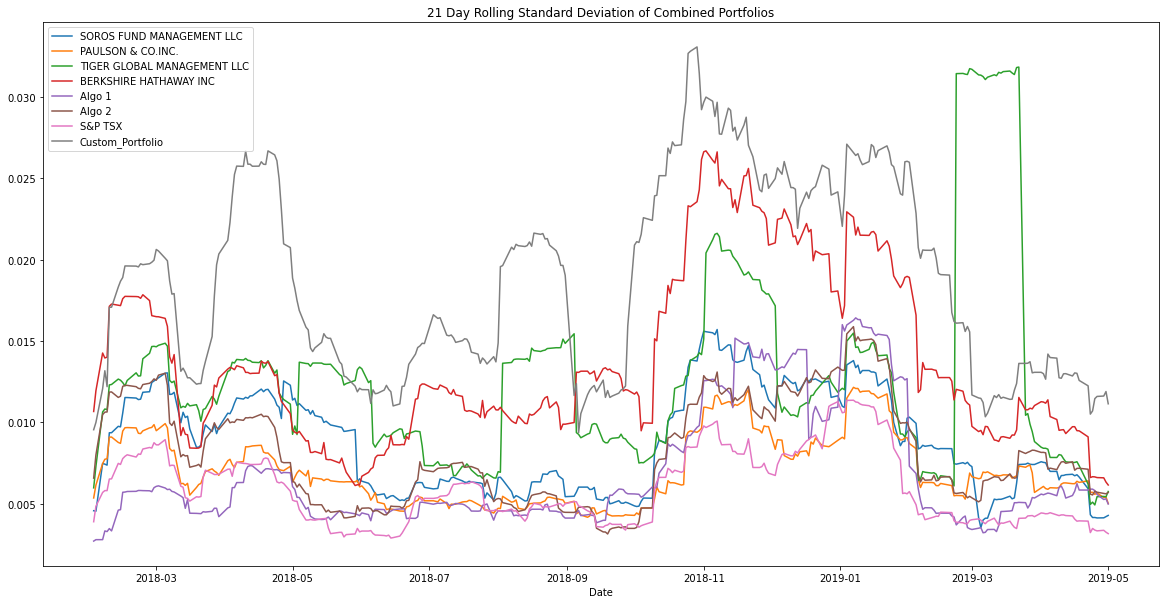

In [178]:
# Calculate rolling standard deviation
rolling_21_std_combined_portfolios = combined_portfolios.rolling(window=21).std()

# Plot rolling standard deviation
rolling_21_std_combined_portfolios.plot(title="21 Day Rolling Standard Deviation of Combined Portfolios", figsize=(20,10))

### Calculate and plot the correlation

In [179]:
# Calculate and plot the correlation
combined_portfolios_correlation = combined_portfolios.corr()
combined_portfolios_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,Custom_Portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.764174,0.526710,0.782414,0.305525,0.834431,0.686681,0.606407
PAULSON & CO.INC.,0.764174,1.000000,0.536534,0.647407,0.320568,0.797494,0.623728,0.509787
TIGER GLOBAL MANAGEMENT LLC,0.526710,0.536534,1.000000,0.384316,0.130845,0.485258,0.438781,0.357483
BERKSHIRE HATHAWAY INC,0.782414,0.647407,0.384316,1.000000,0.294696,0.783254,0.649817,0.708736
Algo 1,0.305525,0.320568,0.130845,0.294696,1.000000,0.321837,0.284789,0.218070
Algo 2,0.834431,0.797494,0.485258,0.783254,0.321837,1.000000,0.754326,0.637473
S&P TSX,0.686681,0.623728,0.438781,0.649817,0.284789,0.754326,1.000000,0.481666
Custom_Portfolio,0.606407,0.509787,0.357483,0.708736,0.218070,0.637473,0.481666,1.000000


<AxesSubplot:>

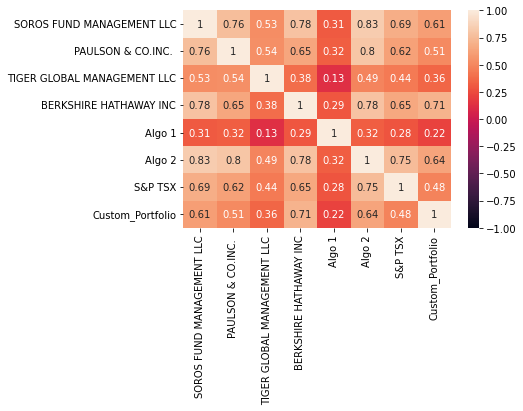

In [180]:
# plotting heat map of correlation between all portfolios
sns.heatmap(combined_portfolios_correlation,  vmin=-1, vmax=1,annot=True)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'Custom Portfolio Beta'}, xlabel='Date'>

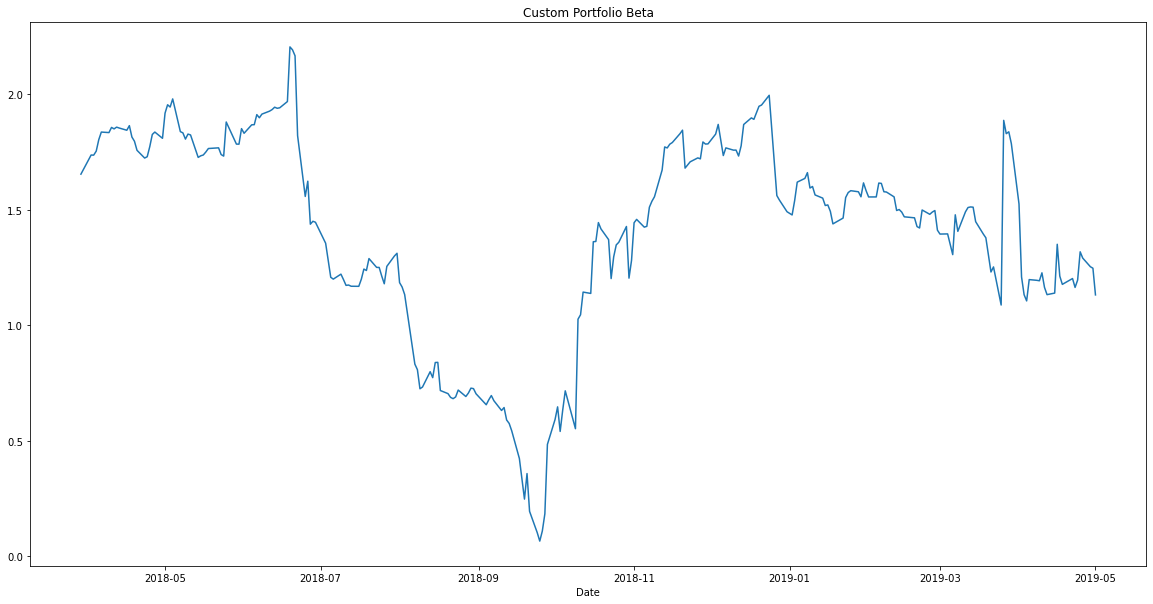

In [181]:
# Calculate and plot Beta
# Calculating Covariance of Custom Portfolio
custom_portfolio_covariance = combined_portfolios['Custom_Portfolio'].rolling(window=60).cov(combined_portfolios['S&P TSX'])

# Calculating variance of S&P TSX
variance_SP_TSX = combined_portfolios['S&P TSX'].rolling(window=60).var()

# Calculating beta of Custom Portfolio 
custom_portfolio_beta = custom_portfolio_covariance / variance_SP_TSX

# Plotting of Customer Portfolio beta trend
custom_portfolio_beta.plot(title="Custom Portfolio Beta", figsize=(20, 10))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [182]:
# Calculate Annualzied Sharpe Ratios
combined_portfolios_sharpe_ratios = (combined_portfolios.mean() * 252) / (combined_portfolios.std() * np.sqrt(252))
combined_portfolios_sharpe_ratios

SOROS FUND MANAGEMENT LLC     -0.088196
PAULSON & CO.INC.             -0.396282
TIGER GLOBAL MANAGEMENT LLC   -1.391612
BERKSHIRE HATHAWAY INC         0.195907
Algo 1                         1.901461
Algo 2                         0.021394
S&P TSX                        0.034651
Custom_Portfolio               0.407456
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios of Combined Portfolios'}>

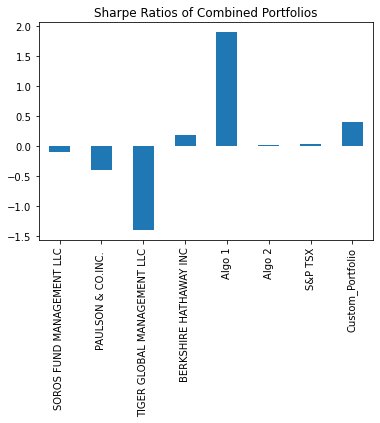

In [183]:
# Visualize the sharpe ratios as a bar plot
combined_portfolios_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios of Combined Portfolios")

### How does your portfolio do?



1. Based on Annualised Standard Deviation and 21 days rolling standard deviation plot, our Custom Portfolio has highest standard deviation.
2. Based on correlation heatmap, our Custom portfolio is best correlated to BERKSHIRE HATHAWAY INC (Whale portfolio) and least correlated to Algo 1 (Algorithmic Portfolio)
3. Based on Sharpe Ratios, our Custom Portfolio has 2nd highest sharpe ratios